In [16]:
%load_ext autoreload
%autoreload 2

import importlib
import sparc
from sparc import load_model
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

color_code = {"UL":matplotlib.colors.to_rgb("#EE3A5B"),
              "LL":matplotlib.colors.to_rgb("#FFD155"),
              "LI":matplotlib.colors.to_rgb("#959595"),
              "TT":matplotlib.colors.to_rgb("#43B962"),
              "TB":matplotlib.colors.to_rgb("#C44B9F"),
              "TD":matplotlib.colors.to_rgb("#0093B7"),
              "Loudness":matplotlib.colors.to_rgb("#FB754D"),
              "Pitch":matplotlib.colors.to_rgb("#FB754D"),}

def plot_art(ax, art, gap=5, skip_y=False,color=None,alpha=1.0, lw=2):
    yticks=[]
    ytick_labels=[]
    labels = ["UL","LL", "LI", "TT", "TB", "TD"]
    chidxs = []
    EMA_channel_label = ['TDX','TDY','TBX','TBY','TTX','TTY','LIX','LIY','ULX','ULY','LLX','LLY']
    channel_label = EMA_channel_label
    for l in labels:
        chidxs.append(EMA_channel_label.index(l+"X"))
        chidxs.append(EMA_channel_label.index(l+"Y"))


    for i,ch_i in enumerate(chidxs):
        ch_label = channel_label[ch_i]
        ytick_labels.append(ch_label)
        if ch_i < 12:
            art_name= ch_label[:2]
            if color is None:
                color = color_code[art_name]
            ax.plot(art[:,ch_i]-gap*i,color=color,alpha=alpha,lw=lw)
        else:
            art_name= ch_label
            if color is None:
                color = color_code[art_name]
            ax.plot(art[:,ch_i]-gap*i,color=color,alpha=alpha,lw=lw)
        yticks.append(-gap*i)
    if skip_y:
        ytick_labels = [""]*len(ytick_labels)

    ax.set_yticks(yticks,ytick_labels,fontsize=15)

    xticks= np.arange(0,len(art),50)
    xtick_labels= [f"{int(x*20/1000)}" for x in xticks]
    ax.set_xticks(xticks, xtick_labels,fontsize=15)
    ax.set_xlabel("Time (s)", fontsize=15)
    ax.set_xlim(0,len(art))
    return yticks

/home/cheoljun/anaconda3/envs/asp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

In [6]:
coder = load_model("en", device= "cpu", use_penn=True)

load_model v3
load_model v3


/home/cheoljun/anaconda3/envs/asp/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [58]:
# import sys
# # import scipy as sp
# import sklearn as skl
# from sklearn.decomposition import PCA
# import pandas as pd


import numpy as np

# Visualize EMA trajectories from wav

In [88]:
color_code = {"UL":mpl.colors.to_rgb("#EE3A5B"),
              "LL":mpl.colors.to_rgb("#FFD155"),
              "LI":mpl.colors.to_rgb("#959595"),
              "TT":mpl.colors.to_rgb("#43B962"),
              "TB":mpl.colors.to_rgb("#C44B9F"),
              "TD":mpl.colors.to_rgb("#0093B7"),
              "Loudness":mpl.colors.to_rgb("#FB754D"),
              "Pitch":mpl.colors.to_rgb("#FB754D"),}

HPRC_channel_label = ['LIX','LIY','ULX','ULY','LLX','LLY','TTX','TTY','TBX','TBY','TDX','TDY']

def plot_art(ax, art, gap=5, skip_y=False,color=None,alpha=1.0, lw=2, plot_velocity=False):
    yticks=[]
    ytick_labels=[]
    labels = ["UL","LL", "LI", "TT", "TB", "TD"]
    chidxs = []
    HPRC_channel_label = ['LIX','LIY','ULX','ULY','LLX','LLY','TTX','TTY','TBX','TBY','TDX','TDY']
    channel_label = HPRC_channel_label
    for l in labels:
        chidxs.append(HPRC_channel_label.index(l+"X"))
        chidxs.append(HPRC_channel_label.index(l+"Y"))
        
    time = np.arange(0, art.shape[0]) / 50 
    # print(len(art))
    # print(time)  
    for i, ch_i in enumerate(chidxs):
        ch_label = channel_label[ch_i]
        ytick_labels.append(ch_label)
        if ch_i < 12:
            art_name= ch_label[:2]
            if color is None:
                color = color_code[art_name]
        else:
            art_name = ch_label
            if color is None:
                color = color_code[art_name]
        x = art[:,ch_i]
        ax.plot(time, x-gap*i,color=color,alpha=alpha,lw=lw)
        if plot_velocity:
            ax.plot(time, 2*np.concatenate(([0], np.diff(x))) - gap*i,color='r',alpha=alpha*0.5,lw=1)

        yticks.append(-gap*i)

    i = i+1
    # diffs = np.diff(art, axis=0)
    # maxdiffs = np.max(diffs, axis = 1)
    diffs = np.vstack([np.zeros((1, 12)), np.abs(np.diff(art, axis=0))])
    maxdiffs = np.max(diffs, axis = 1)
    ax.plot(time, 2*maxdiffs-gap*i,color='r',alpha=alpha*0.5,lw=lw)
    yticks.append(-gap*i)
    ytick_labels.append('~max velocity')

    if skip_y:
        ytick_labels = [""]*len(ytick_labels)

    ax.set_yticks(yticks,ytick_labels,fontsize=15)

    # xticks= np.arange(0,len(art),50)
    # xtick_labels= [f"{int(x*20/1000)}" for x in xticks]
    # ax.set_xticks(xticks, xtick_labels,fontsize=15)
    ax.set_xlabel("Time (s)", fontsize=15)
    # ax.set_xlim(0,len(art))
    return yticks

In [ ]:
yticks=[]
ytick_labels=[]
labels = ["UL","LL", "LI", "TT", "TB", "TD"]
chidxs = []
HPRC_channel_label = ['LIX','LIY','ULX','ULY','LLX','LLY','TTX','TTY','TBX','TBY','TDX','TDY']

In [ ]:
# wav_file  = '../sample_audio/pataka-fast.wav'
wav_file  = '../sample_audio/be2d.wav'
wav_file2  = '../sample_audio/be2d-fran-trim-2.wav'
wav_file3  = '../sample_audio/be2d-chin-trim.wav'

# wav_file  = '/Volumes/Nexus4/DBS/derivatives/sub-DM1033/aec/sub-DM1033_ses-intraop_task-lombard_run-03_recording-directionalmicaec_physio.wav'
# wav_file = '../sample_audio/sub-DM1033_ses-intraop_task-lombard_run-03_directionalmicaec-start-99s.wav'

codes = [coder.encode(f) for f in [wav_file, wav_file2, wav_file3]]
# code = coder.encode(wav_file)
# code2 = coder.encode(wav_file2)

# sound = out['wav']
# ema = out['ema'].squeeze()


        # x = art[:,ch_i]
        # ax.plot(time, np.concatenate(0, np.diff(x))-gap*i,color='r',alpha=alpha*0.5,lw=1)
        # ax.plot(time, x-gap*i,color=color,alpha=alpha,lw=lw)
# i = i+1
# diffs = np.vstack([np.zeros((1, 12)), np.diff(ema, axis=0)])
# maxdiffs = np.max(ema, axis = 1)
# ax.plot(time[2:-1], maxdiffs-gap*i,color=color,alpha=alpha,lw=lw)
# maxdiffs.shape
# maxdiffs.shape

wav, wav_fs = sf.read(wav_file)
# # wav.size


# {k:v.shape for k, v in codes[1].items()}
# {k:v.shape for k, v in code.items()}
        

In [4]:
# Inversion
# EMA channel_label = ['TDX','TDY','TBX','TBY','TTX','TTY','LIX','LIY','ULX','ULY','LLX','LLY']
code = coder.encode(wav_file)

/home/cheoljun/anaconda3/envs/asp/lib/python3.10/site-packages/torch/nn/functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [5]:
#shapes
for name, values in code.items():
    print(f"{name}: {values.shape}")

ema: (475, 12)
loudness: (477, 1)
pitch: (476, 1)
periodicity: (476, 1)
pitch_stats: (2,)
spk_emb: (64,)
ft_len: ()


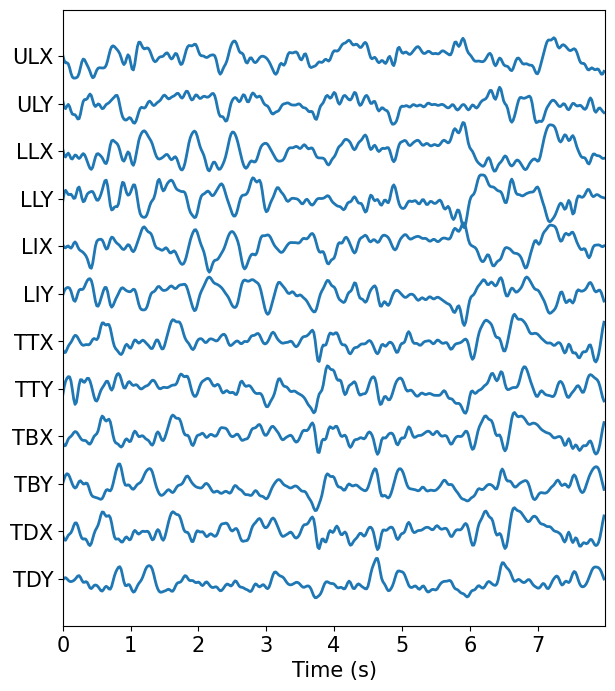

In [6]:
fig,ax = plt.subplots(1,1, figsize=(7,8))
plot_art(ax, code['ema'][:400], color='C0', gap=6, alpha=1, lw=2)
plt.show()

In [7]:
# Synthesis
wav = coder.decode(**code)

In [8]:
wav_file = '../sample_audio/rainbow-lat.wav'

code_orig = coder.encode(wav_file)

wav = coder.decode(**code_orig)
sf.write(wav_file[0:-4] + '-resynth.wav', wav, coder.sr)

# ground truth
wavt,tsr = sf.read(wav_file)
ipd.display(ipd.Audio(wavt, rate=tsr))

# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

_extract_ema: v4


# Encode, resynthesize, perturb wav file

In [ ]:
vars_timeseries = ['ema', 'loudness', 'pitch', 'periodicity']
# wav_file = '/Users/ly546/Downloads/sub-DM1033_ses-intraop_task-lombard_run-03_clip.wav'
code_orig = coder.encode(wav_file)
# code_orig = {k : v.squeeze().shape for k, v in code_orig.items() if k in ['ema', 'loudness', 'pitch', 'periodicity']}
# code_orig =  

code_orig = {k: (v.squeeze(axis=0) if k in vars_timeseries+["spk_emb"] and v.shape[0]==1 else v) for k, v in code_orig.items()}
# {k : (v.shape if k in ['ema', 'loudness', 'pitch', 'periodicity', 'acoustics_wvlm', 'spk_emb'] else v) for k,v in code_orig.items()}


### Plot the SPARC linear transform from auditory to motor space

In [ ]:
W = coder.inverter.linear_model.weight.float().numpy()
B = coder.inverter.linear_model.bias.float().numpy()
fig, ax = plt.subplots(figsize=[20, 10])
ax.imshow(W[:, 100:200])
W.shape

In [ ]:
wav = coder.decode(**code_orig)
sf.write(wav_file[0:-4] + '-resynth.wav', wav, coder.sr)

# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

In [9]:
#sf.write('../sample_audio/aave_sample-enhanced-v2_resynth.wav', wav, 16000)
sf.write('../sample_audio/ppa_resynth.wav', wav, 16000)

In [10]:
!cp /home/cheoljun/ppgs/segment5.wav ../sample_audio/ppa.wav

In [11]:
# ground truth reference
wavt,tsr = sf.read(wav_file)
ipd.display(ipd.Audio(wavt, rate=tsr))

# Detect audio errors from bed to bad, apply to motor command

In [73]:
vars_timeseries = ['ema', 'loudness', 'pitch', 'periodicity']

wav_file_bed  = '../sample_audio/bed-lat.wav'
wav_file_bAd  = '../sample_audio/bad-lat.wav'

# trim wav files to make them equal length
wav_bed,wav_bed_sr = sf.read(wav_file_bed)
wav_bAd,wav_bAd_sr = sf.read(wav_file_bAd)

if len(wav_bed)>len(wav_bAd): 
    wav_bed = wav_bed[0:len(wav_bAd)]
else:
    wav_bAd = wav_bAd[0:len(wav_bed)]

print(len(wav_bed), len(wav_bAd))
sf.write(wav_file_bed[0:-4] + '-trim.wav', wav_bed, wav_bed_sr)
sf.write(wav_file_bAd[0:-4] + '-trim.wav', wav_bAd, wav_bed_sr)


73330 73330


In [95]:
wav_file_bed  = '../sample_audio/bed-lat-trim.wav'
wav_file_bAd  = '../sample_audio/bad-lat-trim.wav'

def squeeze_code(code_orig): 
    return {k: (v.squeeze(axis=0) if k in vars_timeseries+["spk_emb"] and v.shape[0]==1 else v) for k, v in code_orig.items()}

codes = [coder.encode(f) for f in [wav_file_bed, wav_file_bAd]]
codes = [squeeze_code(c) for c in codes]


/Users/ly546/Library/CloudStorage/GoogleDrive-1prlabu1@gmail.com/My Drive/shbt/BML-guenther/2024S-guenther-audio-primitives/util/Speech-Articulatory-Coding/envs/lib/python3.9/site-packages/torch/nn/functional.py:5849: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


_extract_ema: v4
_extract_ema: v4


In [96]:
# get error traces 
W = coder.inverter.linear_model.weight.float().numpy()
B = coder.inverter.linear_model.bias.float().numpy()

A_error = codes[1]['acoustics_wvlm'] - codes[0]['acoustics_wvlm']
M_error = np.dot(A_error, W.T) + B
M_error = M_error


In [97]:
code_new = copy.deepcopy(codes[0])
code_new['ema'] = codes[0]['ema'] + M_error 

codes.append(code_new)

tab:red
tab:blue
tab:purple


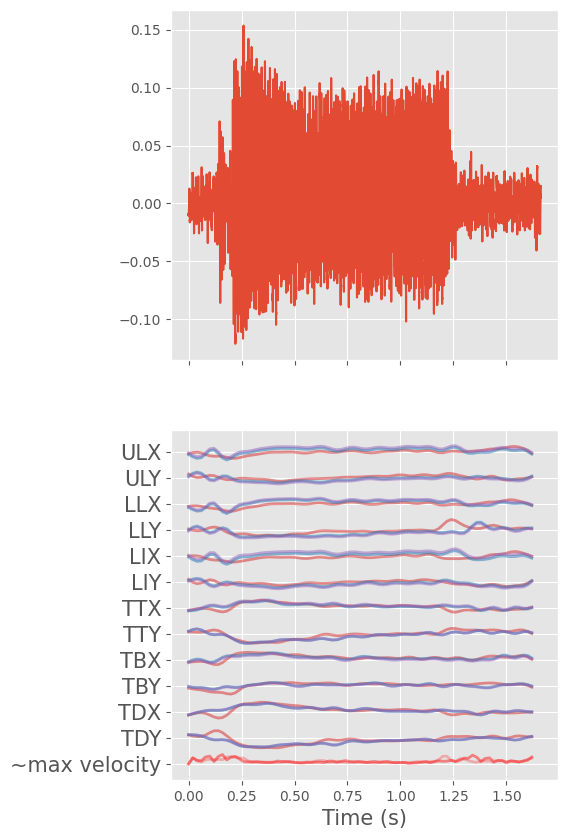

In [99]:
fig,ax = plt.subplots(2,1, figsize=(5,10), sharex=True)

ax[0].plot(np.arange(0, wav_bed.size) / sr, wav_bed)

for code, color in zip(codes, ['tab:red', 'tab:blue','tab:purple']): 
    print(color)
    plot_art(ax[1], (code['ema']), color=color, gap=6, alpha=0.5, lw=2)
# plot_art(ax[1], perturb_ema(code['ema']), color='C0', gap=6, alpha=0.5, lw=2)
# plot_art(ax[1], (code2['ema']), color='C0', gap=6, alpha=0.5, lw=1)


plt.show()

In [100]:
wavs_resynth = [coder.decode(**c) for c in codes]

sf.write(wav_file_bed[0:-4] + '-resynth.wav', wavs_resynth[0], coder.sr)
sf.write(wav_file_bAd[0:-4] + '-resynth.wav', wavs_resynth[1], coder.sr)
sf.write(wav_file_bed[0:-4] + '-pert-towards-bad-resynth.wav', wavs_resynth[2], coder.sr)


In [101]:
# listen to all three: 
ipd.display(ipd.Audio(wavs_resynth[0], rate=coder.sr))
ipd.display(ipd.Audio(wavs_resynth[1], rate=coder.sr))
ipd.display(ipd.Audio(wavs_resynth[2], rate=coder.sr))


# Voice Conversion

In [12]:
# src_wav_file = '/Users/ly546/Downloads/sub-DM1033_ses-intraop_task-lombard_run-03_clip.wav' # '/Users/ly546/Downloads/sub-DM1033_ses-intraop_task-lombard_run-03_clip.wav'
# src_wav_file = '../sample_audio/sub-DM1033_ses-intraop_task-lombard_run-03_directionalmicaec-start-99s.wav'
src_wav_file = '../sample_audio/thisisme-lat.wav'

# targspkemb_wav_file = '../sample_audio/be2d-chin-trim.wav'
targspkemb_wav_file = '../sample_audio/thisisme-fran.wav'


In [13]:
converted_wav = coder.convert(src_wav_file, trg_wav_file)

/home/cheoljun/anaconda3/envs/asp/lib/python3.10/site-packages/torch/nn/functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [14]:
converted_wav = coder.convert(src_wav_file, targspkemb_wav_file)
ipd.display(ipd.Audio(converted_wav, rate=coder.sr))

sf.write(src_wav_file[0:-4] + '_voice-from_' + os.path.split(targspkemb_wav_file)[1][0:-4]  + '-resynth.wav', converted_wav, coder.sr)


In [15]:
src_code = coder.encode(src_wav_file)

_extract_ema: v4


In [16]:
converted_code = coder.encode(converted_wav)

_extract_ema: v4


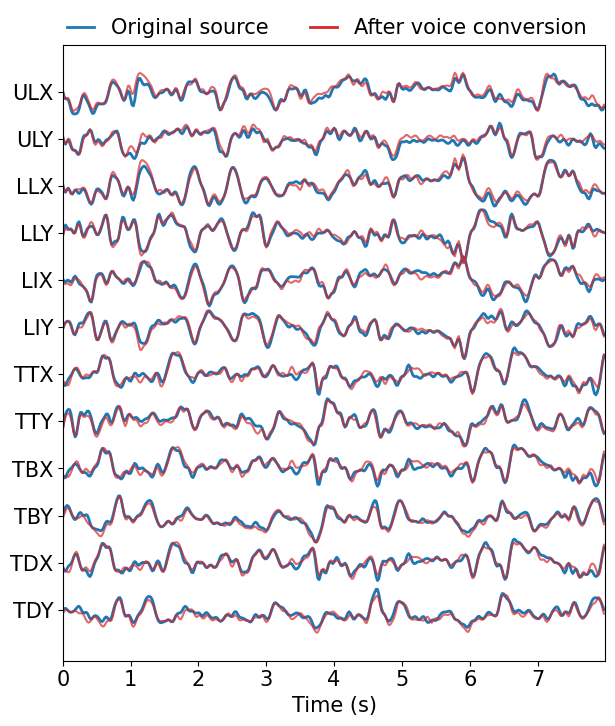

In [17]:
# Articulatory traces remain consistent after voice conversion.
fig,ax = plt.subplots(1,1, figsize=(7,8))
plot_art(ax, src_code['ema'][:400], color='C0', gap=6, alpha=1, lw=2)
plot_art(ax, converted_code['ema'][:400], color='C3', gap= 6, alpha=0.7, lw=1.5)
ax.plot([],[],label="Original source", color='C0', lw=2)
ax.plot([],[],label="After voice conversion", color='C3', lw=2,)
ax.legend(fontsize=15, handlelength=1.3,loc='lower right',bbox_to_anchor=(1.0,0.98), ncol=2, frameon=False)
plt.show()

In [18]:
# source audio
src_wav,sr = sf.read(src_wav_file)
ipd.display(ipd.Audio(src_wav, rate=sr))

In [19]:
# target audio
trg_wav,sr = sf.read(targspkemb_wav_file)
ipd.display(ipd.Audio(trg_wav, rate=sr))

# Unseen Language

In [20]:
wav_file = "../sample_audio/italian.wav"

In [21]:
code = coder.encode(wav_file)

/home/cheoljun/anaconda3/envs/asp/lib/python3.10/site-packages/torch/nn/functional.py:5137: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [22]:
wav = coder.decode(**code)

In [23]:
# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

In [24]:
# ground truth reference
wavt,tsr = sf.read(wav_file)
ipd.display(ipd.Audio(wavt, rate=tsr))